# AND-gate circuit for muscle inflammation assessment

In [3]:
# Importing crucial packages
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as scint

### System of differential equations modelling our circuit:
$$\dot{X_1} = \alpha_1 · X_6^{g_{16}} - \beta_1 X_1^{h_{11}}$$
$$\dot{X_2} = \alpha_2 · X_6^{g_{26}} - \beta_2 X_2^{h_{22}}$$
$$\dot{X_3} = \alpha_3 · X_1^{g_{31}} · X_2^{g_{32}} · X_7^{g_{37}} - \beta_3 X_3^{h_{33}}$$
$$\dot{X_4} = \alpha_4 · X_8^{g_{48}} · X_3^{g_{43}} · X_9^{g_{49}} - \beta_4 X_4^{h_{44}}$$
$$\dot{X_5} = \alpha_5 · X_4^{g_{54}} · X_8^{g_{58}} - \beta_5 X_5^{h_{55}}$$

### Steady State of the system
$$X^{*}_1 = exp\left( \frac{g_{16}·log(X_6) - log(\beta_1) + log(\alpha_1)}{h_{11}} \right)$$
$$X^{*}_2 = exp\left( \frac{g_{26}·log(X_6) - log(\beta_2) + log(\alpha_2)}{h_{22}} \right)$$
$$X^{*}_3 = exp\left( \frac{g_{31}·log(X^{*}_1) + g_{32}·log(X^{*}_2) + g_{37}·log(X_7) - log(\beta_3) + log(\alpha_3)}{h_{33}} \right)$$
$$X^{*}_4 = exp\left( \frac{g_{48}·log(X_8) + g_{43}·log(X^{*}_3) + g_{49}·log(X_9) - log(\beta_4) + log(\alpha_4)}{h_{44}} \right)$$
$$X^{*}_5 =exp\left( \frac{g_{54}·log(X^{*}_4) + g_{58}·log(X_8) - log(\beta_5) + log(\alpha_5)}{h_{55}} \right)$$

In [4]:
# EXAMPLE SET OF PARAMETERS (without $alpha_1$ and "$X_8$")
a1 = 4 ; a2 = 5 ; a3 = 0.5; a4= 0.3 ; a5 = 1
b1 = 1 ; b2 = 1 ; b3 = 1 ; b4 = 1 ; b5 = 1
h11 = 0.5 ; h22 = 0.5 ; h33 = 0.5 ; h44 = 0.5 ; h55 = 0.8
g16 = 0.4 ; g26 = 0.4
g31 = 0.6 ; g32 = 0.1 ; g37 = 0
g48 = 1 ; g43 = 0.8 ; g49 = 0
g54 = -1 ; g58 = 0.4
X6 = 5 ; X7 = 4 ; X8 = 0.1 ; X9 = 4

In [5]:
def SS():
    SX1 = np.exp((g16*np.log(X6) - np.log(b1) + np.log(a1))/h11)
    SX2 = np.exp((g26*np.log(X6) - np.log(b2) + np.log(a2))/h22)
    SX3 = np.exp((g31*np.log(SX1) + g32*np.log(SX2) + g37*np.log(X7) - np.log(b3) + np.log(a3))/h33)
    SX4 = np.exp((g48*np.log(X8) + g43*np.log(SX3) + g49*np.log(X9) - np.log(b4) + np.log(a4))/h44)
    SX5 = np.exp((g54*np.log(SX4) + g58*np.log(X8) - np.log(b5) + np.log(a5))/h55)

    return [
        SX1,
        SX2, 
        SX3,
        SX4,
        SX5 
    ]

## Initial testing

#### mDys + NOT IL-1 -> NOT produce antagonist (& inflammation) 

In [6]:
# In this case we set X8 low, and a1 high
X8 = 0.1 ; a1 = 4

In [7]:
SS()

[57.982373094215625,
 90.5974579597119,
 80.41154275363132,
 1.0063566958861752,
 0.31373290749226673]

In this case, the Steady State matches with the expected: mDys prudction is noticable, while IL-1Ra production is very low. Inflammation remains close to zero. 

To perfom a simulation, we need to define a function for our SDE:

In [8]:
def F(P,t):

    X1 = P[0]; X2 = P[1]; X3 = P[2] ; X4 = P[3] ; X5 = P[4]
    SYS = [
        a1*(X6**g16) - b1*(X1**h11),
        a2*(X6**g26) - b2*(X2**h22),
        a3*(X1**g31)*(X2**g32)*(X7**g37) - b3*(X3**h33),
        a4*(X8**g48)*(X3**g43)*(X9**g49) - b4*(X4**h44),
        a5*(X4**g54)*(X8**g58) - b5*(X5**h55)
    ]

    return SYS

In [10]:
tpoints=5000; tmax=200
time = np.linspace(0,tmax,tpoints)
P0 = [1,1,1,1,1] # This will be the standar initial condition from now on.
Ps = scint.odeint(F,P0,time)
# print(Ps[:100])

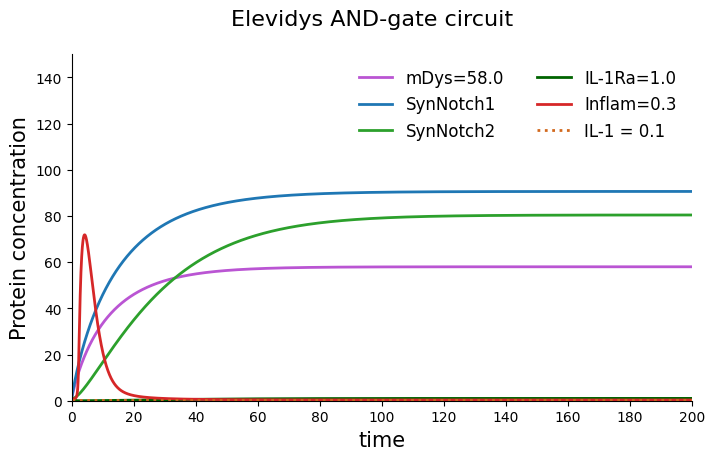

In [11]:
fig,ax = plt.subplots(figsize=(8,4.5))
fig.suptitle('Elevidys AND-gate circuit',fontsize=16)

SteadyState = SS()

lw=2
ax.plot(time,Ps[:,0],c="mediumorchid",lw=lw,label=f'mDys={round(SteadyState[0],1)}')
ax.plot(time,Ps[:,1],c="tab:blue",lw=lw,label='SynNotch1')
ax.plot(time,Ps[:,2],c="tab:green",lw=lw,label='SynNotch2')
ax.plot(time,Ps[:,3],c="darkgreen",lw=lw,label=f'IL-1Ra={round(SteadyState[3],1)}')
ax.plot(time,Ps[:,4],c="tab:red",lw=lw,label=f'Inflam={round(SteadyState[4],1)}')
ax.axhline(X8,c='chocolate',lw=lw,ls=':',label=f'IL-1 = {X8}')

ymax=150
xmax=tmax
ax.set_ylim(0,ymax)
ax.set_xlim(0,xmax)
axlabelsize=15
ax.set_ylabel('Protein concentration',fontsize=axlabelsize)
ax.set_xlabel('time',fontsize=axlabelsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks(np.arange(0,xmax+abs(0.1*xmax),abs(0.1*xmax)))

ax.legend(frameon=False,fontsize='large',ncol=2)

plt.show()

In [12]:
# We can see how the plot matches with the theoretical Steady State: 
SS()

[57.982373094215625,
 90.5974579597119,
 80.41154275363132,
 1.0063566958861752,
 0.31373290749226673]

#### mDys + IL-1 -> produce antagonist (& inflammation) 

In [13]:
# We now increase IL-1 25-fold
X8 = 2.5 ; a1 = 4

In [14]:
SS()

[57.982373094215625,
 90.5974579597119,
 80.41154275363132,
 628.9729349288594,
 0.0005019726519876266]

We see how, in this case, the production of IL-1Ra increased 600-fold, but inflamation remains low. Again, this matches with the desired behavior.

In [15]:
tpoints=5000; tmax=200
time = np.linspace(0,tmax,tpoints)
P0 = [1,1,1,1,1]
Ps = scint.odeint(F,P0,time)

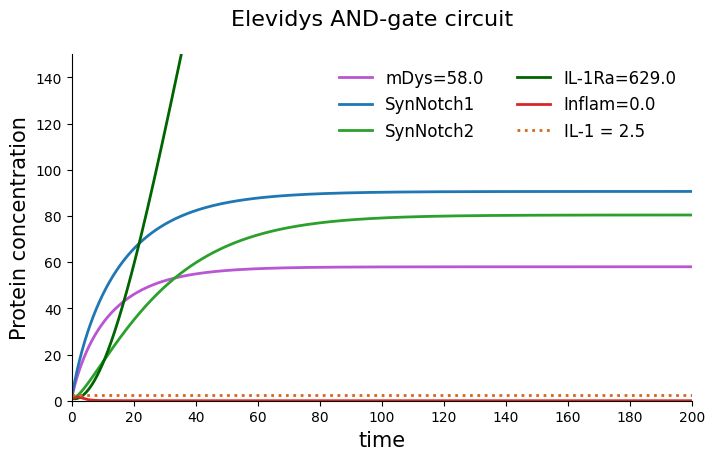

In [16]:
fig,ax = plt.subplots(figsize=(8,4.5))
fig.suptitle('Elevidys AND-gate circuit',fontsize=16)

SteadyState = SS()

lw=2
ax.plot(time,Ps[:,0],c="mediumorchid",lw=lw,label=f'mDys={round(SteadyState[0],1)}')
ax.plot(time,Ps[:,1],c="tab:blue",lw=lw,label='SynNotch1')
ax.plot(time,Ps[:,2],c="tab:green",lw=lw,label='SynNotch2')
ax.plot(time,Ps[:,3],c="darkgreen",lw=lw,label=f'IL-1Ra={round(SteadyState[3],1)}')
ax.plot(time,Ps[:,4],c="tab:red",lw=lw,label=f'Inflam={round(SteadyState[4],1)}')
ax.axhline(X8,c='chocolate',lw=lw,ls=':',label=f'IL-1 = {X8}')

ymax=150
xmax=tmax
ax.set_ylim(0,ymax)
ax.set_xlim(0,xmax)
axlabelsize=15
ax.set_ylabel('Protein concentration',fontsize=axlabelsize)
ax.set_xlabel('time',fontsize=axlabelsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks(np.arange(0,xmax+abs(0.1*xmax),abs(0.1*xmax)))

ax.legend(frameon=False,fontsize='large',ncol=2)

plt.show()

#### NOT mDys + IL-1 -> NOT produce antagonist (& inflammation) 

In [18]:
X8 = 2.5 ; a1 = 0.25
SS()

[0.2264936448992799,
 90.5974579597119,
 0.1036168620906928,
 0.014955854262136097,
 302.3124087920057]

In this case, we get the expected behavior again. mDys production is very low, as it is for IL-R1a. Meanwhile, the presence of IL-1 makes inflammation increase.

In [19]:
tpoints=5000; tmax=200
time = np.linspace(0,tmax,tpoints)
P0 = [1,1,1,1,1]
Ps = scint.odeint(F,P0,time)

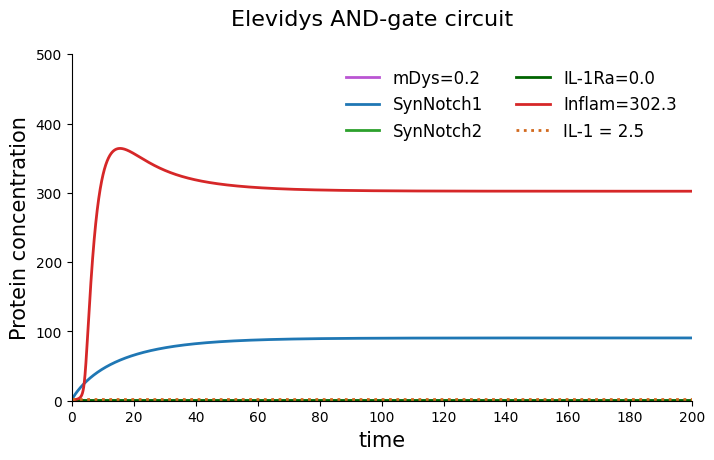

In [22]:
fig,ax = plt.subplots(figsize=(8,4.5))
fig.suptitle('Elevidys AND-gate circuit',fontsize=16)

SteadyState = SS()

lw=2
ax.plot(time,Ps[:,0],c="mediumorchid",lw=lw,label=f'mDys={round(SteadyState[0],1)}')
ax.plot(time,Ps[:,1],c="tab:blue",lw=lw,label='SynNotch1')
ax.plot(time,Ps[:,2],c="tab:green",lw=lw,label='SynNotch2')
ax.plot(time,Ps[:,3],c="darkgreen",lw=lw,label=f'IL-1Ra={round(SteadyState[3],1)}')
ax.plot(time,Ps[:,4],c="tab:red",lw=lw,label=f'Inflam={round(SteadyState[4],1)}')
ax.axhline(X8,c='chocolate',lw=lw,ls=':',label=f'IL-1 = {X8}')

ymax=500
xmax=tmax
ax.set_ylim(0,ymax)
ax.set_xlim(0,xmax)
axlabelsize=15
ax.set_ylabel('Protein concentration',fontsize=axlabelsize)
ax.set_xlabel('time',fontsize=axlabelsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks(np.arange(0,xmax+abs(0.1*xmax),abs(0.1*xmax)))

ax.legend(frameon=False,fontsize='large',ncol=2)

plt.show()

One more time, our example set gives a succesfull behavior. In the absence of mDys, IL-R1a is not produced, so that a high IL-1 concentration can freely trigger an inflammation response. 

#### NOT mDys + NOT IL-1 -> NOT produce antagonist (& no inflammation) 

Finally, let's see what happens when we don't have neither IL-1 or microdystrophin.

In [25]:
X8 = 0.1 ; a1 = 0.5
SS()

[0.9059745795971195,
 90.5974579597119,
 0.5468930768725326,
 0.00034267813175697384,
 6782.534505362654]

We already see how inflammation rockets up...

In [26]:
tpoints=5000; tmax=200
time = np.linspace(0,tmax,tpoints)
P0 = [1,1,1,1,1]
Ps = scint.odeint(F,P0,time)

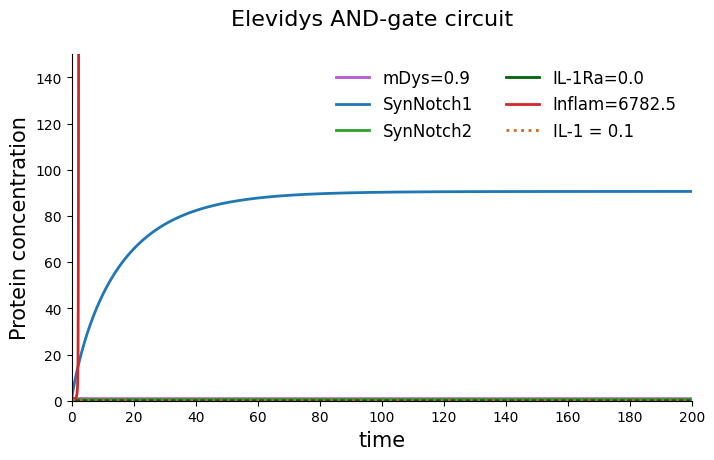

In [27]:
fig,ax = plt.subplots(figsize=(8,4.5))
fig.suptitle('Elevidys AND-gate circuit',fontsize=16)

SteadyState = SS()

lw=2
ax.plot(time,Ps[:,0],c="mediumorchid",lw=lw,label=f'mDys={round(SteadyState[0],1)}')
ax.plot(time,Ps[:,1],c="tab:blue",lw=lw,label='SynNotch1')
ax.plot(time,Ps[:,2],c="tab:green",lw=lw,label='SynNotch2')
ax.plot(time,Ps[:,3],c="darkgreen",lw=lw,label=f'IL-1Ra={round(SteadyState[3],1)}')
ax.plot(time,Ps[:,4],c="tab:red",lw=lw,label=f'Inflam={round(SteadyState[4],1)}')
ax.axhline(X8,c='chocolate',lw=lw,ls=':',label=f'IL-1 = {X8}')

ymax=150
xmax=tmax
ax.set_ylim(0,ymax)
ax.set_xlim(0,xmax)
axlabelsize=15
ax.set_ylabel('Protein concentration',fontsize=axlabelsize)
ax.set_xlabel('time',fontsize=axlabelsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks(np.arange(0,xmax+abs(0.1*xmax),abs(0.1*xmax)))

ax.legend(frameon=False,fontsize='large',ncol=2)

plt.show()

Here's where our example parameter set fails. We are supppose to get no inflammation, given that we have low concentration of IL-1. However, we see how inflammation level is even higher than before.

To obtain a successful parameter vector we rely on a common parameter estimation method called "genetic algorithm".  

# GENETIC ALGORITHM

### Steady State calculation (parameter as argument)

In [63]:
import numpy as np
def SSc(p,a1,X8):
    
    a2 = p[0] ; a3 = p[1]; a4= p[2] ; a5 = p[3]
    b1 = p[4] ; b2 = p[5] ; b3 = p[6] ; b4 = p[7] ; b5 = p[8]
    h11 = p[9] ; h22 = p[10] ; h33 = p[11] ; h44 = p[12] ; h55 = p[13]
    g16 = p[14] ; g26 = p[15]
    g31 = p[16] ; g32 = p[17] ; g37 = p[18]
    g48 = p[19] ; g43 = p[20] ; g49 = p[21]
    g54 = p[22] ; g58 = p[23]
    X6 = p[24] ; X7 = p[25] ; X9 = p[26]

    SX1 = np.exp((g16*np.log(X6) - np.log(b1) + np.log(a1))/h11)
    SX2 = np.exp((g26*np.log(X6) - np.log(b2) + np.log(a2))/h22)
    SX3 = np.exp((g31*np.log(SX1) + g32*np.log(SX2) + g37*np.log(X7) - np.log(b3) + np.log(a3))/h33)
    SX4 = np.exp((g48*np.log(X8) + g43*np.log(SX3) + g49*np.log(X9) - np.log(b4) + np.log(a4))/h44)
    SX5 = np.exp((g54*np.log(SX4) + g58*np.log(X8) - np.log(b5) + np.log(a5))/h55)

    return [
        SX1,
        SX2, 
        SX3,
        SX4,
        SX5 
    ]

### Random invididual function

In [84]:
import numpy as np
def random_indiv():
    prandom=[0]*27
    prandom[0] = np.random.rand()*9.9 + 0.01 # a2
    prandom[1] = np.random.rand()*9.9 + 0.01 # a3
    prandom[2] = np.random.rand()*9.9 + 0.01 # a4
    prandom[3] = np.random.rand()*9.9 + 0.01 # a5
    prandom[4] = np.random.rand()*9.9 + 0.01 # b1
    prandom[5] = np.random.rand()*9.9 + 0.01 # b2
    prandom[6] = np.random.rand()*9.9 + 0.01 # b3
    prandom[7] = np.random.rand()*9.9 + 0.01 # b4
    prandom[8] = np.random.rand()*9.9 + 0.01 # b5
    prandom[9] = np.random.rand()*2.9 + 0.01 # h11
    prandom[10] = np.random.rand()*2.9 + 0.01 # h22
    prandom[11] = np.random.rand()*2.9 + 0.01 # h33
    prandom[12] = np.random.rand()*2.9 + 0.01 # h44
    prandom[13] = np.random.rand()*2.9 + 0.01 # h55
    prandom[14] = np.random.rand()*2.9 + 0.01 # g16
    prandom[15] = np.random.rand()*2.9 + 0.01 # g26
    prandom[16] = np.random.rand()*2.9 + 0.01 # g31
    prandom[17] = np.random.rand()*2.9 + 0.01 # g32
    prandom[18] = np.random.rand()*2.9 + 0.01 # g37
    prandom[19] = np.random.rand()*2.9 + 0.01 # g48
    prandom[20] = np.random.rand()*2.9 + 0.01 # g43
    prandom[21] = np.random.rand()*2.9 + 0.01 # g49
    prandom[22] = np.random.rand()*(-2.9) - 0.01 # g54
    prandom[23] = np.random.rand()*2.9 + 0.01 # g58
    prandom[24] = np.random.rand()*19.9 + 0.01 # X6
    prandom[25] = np.random.rand()*19.9 + 0.01 # X7
    prandom[26] = np.random.rand()*19.9 + 0.01 # X9
    return prandom

In [65]:
p = random_indiv()
print(p)

[4.836466162279162, 6.6126838338114124, 5.475652050268998, 2.3623898911629864, 3.9939504067433584, 2.103764217964882, 3.008888676409315, 6.935717931057544, 6.5974455316143805, 2.009179935379461, 0.23675371222263256, 2.2227637489702716, 1.6301756526572253, 1.0020816123871155, 0.35265620062490927, 1.599181800680463, 1.137750288717009, 0.5579234414197568, 0.17495802962071597, 2.0331713109997147, 2.5710231010157294, 2.7390111066365552, 2.40821736824286, 2.377748309588519, 9.978112381272846, 10.65240585010341, 13.727528211742287]


In [66]:
print(SSc(p,a1=4,X8=0.1))

[1.498589168268504, 188464091.9452137, 252.21225490038694, 24497.779653274894, 53716483.36909108]


### Initial pupulation function

In [67]:
def initial_population(n):
    P = [[0]]*n
    for i in range(n):
        P[i] = random_indiv()
    return P

In [68]:
P = initial_population(10)
print(P)

[[6.503253554773464, 6.234937784579133, 3.1008230299687485, 0.259094588574055, 3.0461122631839768, 3.6569096867216175, 5.216717340056134, 6.11675817851193, 9.628230324266115, 2.2571754068650294, 0.12074287289691825, 1.4409358331919009, 0.037606893803189004, 1.6612993877264128, 2.116629624456545, 0.11052995670843416, 1.2091653532620663, 0.9848016679898761, 1.7712412249002791, 0.2911379520391704, 0.9017332406356081, 2.189665205722007, 1.9675135737217793, 0.9637948363943171, 6.343345221325549, 15.282764463321335, 2.825156687849487], [3.827056654597329, 2.3858218993765794, 6.978568481730134, 6.731458279863404, 6.801080030148845, 2.6168637576491935, 1.6178553910983098, 8.375470284389536, 8.327373688580433, 1.7196471510527804, 2.5091920295572314, 2.5466744396793057, 0.08642507278424313, 1.7817445130719918, 1.384011420892496, 1.3985381865979043, 0.9053268224700072, 0.4353543228655524, 2.059272742304987, 2.8289856712245225, 2.01705999419419, 1.5773037820686637, 1.5669464401419797, 2.4079821965

### Scoring function

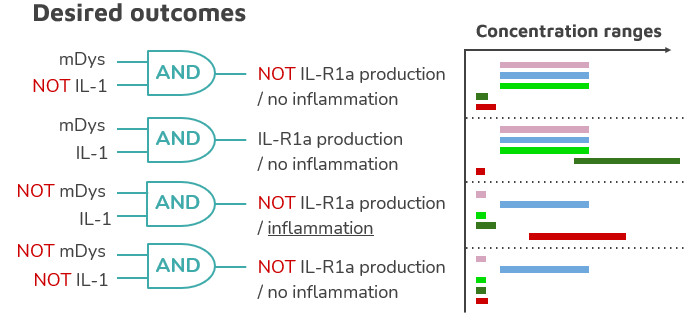

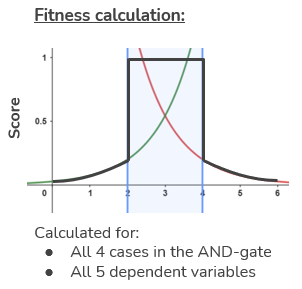

In [69]:
def scoring(P):

    N = len(P)
    scores = [0]*N
    inputs = [
        [4,0.01],
        [4,4],
        [0.01,0.01],
        [0.01,4]
    ]
    ranges = [
        [[50,500],[50,500],[50,500],[0,25],[0,50]],
        [[50,500],[50,500],[50,500],[400,1000],[0,25]],
        [[0,25],[50,500],[0,25],[0,25],[0,50]],
        [[0,25],[50,500],[0,25],[0,50],[250,750]]
    ]
    for i in range(N):
        score = 0
        for j in range(4):
            steadystate = SSc(P[i],a1=inputs[j][0],X8=inputs[j][1])
            # print(i, j, steadystate)
            rang = ranges[j]
            for d in range(5):
                ran = rang[d]
                if (steadystate[d]>=ran[0] and steadystate[d]<=ran[1]):
                    score = score + 1
                elif (steadystate[d]<ran[0]):
                    score = score + 0.2*np.exp(steadystate[d]-ran[0])
                elif (steadystate[d]>ran[1]):
                    score = score + 0.2*np.exp(-steadystate[d]+ran[0])
        # print (i, score)
        scores[i] = score

    return scores

In [70]:
prueba_pop = initial_population(100)

In [71]:
prueba_scoring = scoring(prueba_pop)
# print(prueba_scoring)
print(np.sort(prueba_scoring))

[0.00000000e+00 9.35081088e-42 1.46993457e-20 2.00000000e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000004e+00
 4.00000000e+00 4.00000000e+00 4.00000000e+00 4.00000000e+00
 4.00000000e+00 4.00000000e+00 4.00000000e+00 4.00000000e+00
 4.00000000e+00 4.00000000e+00 4.00000567e+00 5.00000000e+00
 5.00000000e+00 5.00000000e+00 6.00000000e+00 6.00000000e+00
 6.00000000e+00 6.00000000e+00 6.00000000e+00 6.00000000e+00
 6.00000000e+00 6.00000000e+00 6.00000000e+00 6.00000000e+00
 6.00000000e+00 6.00000000e+00 6.02033894e+00 7.00000000e+00
 7.00000000e+00 7.00000000e+00 7.00000000e+00 7.00000000e+00
 7.00000000e+00 7.00000000e+00 7.00000000e+00 7.00000000e+00
 7.00065551e+00 7.27288188e+00 8.00000000e+00 8.00000000e+00
 8.00000000e+00 8.00000000e+00 8.00000000e+00 8.00000000e+00
 8.00000000e+00 8.00000000e+00 8.00000000e+00 8.00000000e+00
 8.00000000e+00 8.00000000e+00 8.00000001e+00 8.00000313e+00
 8.00002583e+00 9.000000

C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:15: RuntimeWarning: overflow encountered in exp
  SX3 = np.exp((g31*np.log(SX1) + g32*np.log(SX2) + g37*np.log(X7) - np.log(b3) + np.log(a3))/h33)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:16: RuntimeWarning: divide by zero encountered in log
  SX4 = np.exp((g48*np.log(X8) + g43*np.log(SX3) + g49*np.log(X9) - np.log(b4) + np.log(a4))/h44)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:17: RuntimeWarning: divide by zero encountered in log
  SX5 = np.exp((g54*np.log(SX4) + g58*np.log(X8) - np.log(b5) + np.log(a5))/h55)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:17: RuntimeWarning: overflow encountered in exp
  SX5 = np.exp((g54*np.log(SX4) + g58*np.log(X8) - np.log(b5) + np.log(a5))/h55)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:16: RuntimeWarning: overflow encountered in exp
  SX4 = np.exp((g48*np.log(X8) + g43*np.log(SX3) + g49*np.log(X9) - np.log

We already have individuals with score higher than 10 out of 20, so we are not that far away...

### Selection function

In [73]:
def select_best(population, scores, fraction=0.3):
    ranking = np.argsort(scores)
    popsize = len(population)
    popsubset = int(popsize*fraction)
    best = []
    for i in range(popsubset):
        best.append(population[ranking[popsize-i-1]])
    return best

In [74]:
prueba_select = select_best(prueba_pop,prueba_scoring,fraction=0.3)
print(np.sort(scoring(prueba_select)))

[ 9.          9.          9.          9.          9.00000016  9.00000308
  9.00022836 10.         10.         10.         10.         10.
 10.         10.         10.         10.         10.         10.
 10.         10.00000007 10.00000239 10.00638937 11.         11.
 11.         11.01662248 12.         12.         12.         13.        ]


### Mate function

In [75]:
def mate(father, mother, mutation_intensity=0.01):
    baby=[]
    for i in range(len(father)):
        rn = np.random.rand()
        if rn > 0.5:
            baby.append(father[i])
        else:
            baby.append(mother[i])
    
    mutated=[]
    for i in range(len(baby)):
        change = (np.random.rand()*2 -1)*mutation_intensity
        mutated.append(baby[i]*(1+change))
    return mutated

### Generation function

In [76]:
import random
import numpy as np
def generation(population,mutation_intensity=0.01,fraction=0.3):
    
    P=len(population)
    scores = scoring(population) 
    next_generation = select_best(population,scores,fraction=fraction)
    N = len(next_generation)
    offspring=[]
    # And then we mate the best ones
    for i in range(N): 
        pos_mother = random.randint(0,N-1)
        mother = next_generation[pos_mother]
        pos_father = random.randint(0,N-1)
        father = next_generation[pos_father]
        son = mate(mother, father,mutation_intensity=mutation_intensity)
        offspring.append(son)
    next_generation = next_generation + offspring

    # We complete the population with random cars
    randompop = initial_population(P - 2*N) 
    next_generation = next_generation + randompop

    # Finally, we shuffle the generated population to avoid possible positional biases
    np.random.shuffle(next_generation)    
    
    return next_generation

In [77]:
prueba_pop = initial_population(100)
best = np.sort(scoring(prueba_pop))
best = best[-1]
print(best)
next = generation(prueba_pop)
bestnext = np.sort(scoring(next))
bestnext = bestnext[-1]
print(bestnext)

12.000000000186098
14.0


C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:17: RuntimeWarning: overflow encountered in exp
  SX5 = np.exp((g54*np.log(SX4) + g58*np.log(X8) - np.log(b5) + np.log(a5))/h55)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:16: RuntimeWarning: overflow encountered in exp
  SX4 = np.exp((g48*np.log(X8) + g43*np.log(SX3) + g49*np.log(X9) - np.log(b4) + np.log(a4))/h44)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:17: RuntimeWarning: divide by zero encountered in log
  SX5 = np.exp((g54*np.log(SX4) + g58*np.log(X8) - np.log(b5) + np.log(a5))/h55)


In [78]:
scoring([select_best(next,scoring(next))[0]])

C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:17: RuntimeWarning: divide by zero encountered in log
  SX5 = np.exp((g54*np.log(SX4) + g58*np.log(X8) - np.log(b5) + np.log(a5))/h55)


[14.0]

### Running multiple generations

In [79]:
def generations(population,gen_num,mutation_intensity=0.01):
    for i in range(gen_num):
        final_generation = generation(population,mutation_intensity=mutation_intensity)
    return final_generation

In [86]:
prueba_pop2 = initial_population(2000)
best2 = np.sort(scoring(prueba_pop))
best2 = best2[-1]
print(best)
nextgens = generations(prueba_pop,200)
bestnextgens = np.sort(scoring(nextgens))
winner_nextgens = bestnextgens[-1]
print(winner_nextgens)

C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:17: RuntimeWarning: overflow encountered in exp
  SX5 = np.exp((g54*np.log(SX4) + g58*np.log(X8) - np.log(b5) + np.log(a5))/h55)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:16: RuntimeWarning: overflow encountered in exp
  SX4 = np.exp((g48*np.log(X8) + g43*np.log(SX3) + g49*np.log(X9) - np.log(b4) + np.log(a4))/h44)


12.000000000186098
15.000000000000327


In [ ]:
select_best(nextgens,scoring(nextgens),fraction=0.3)[0]

In [ ]:
manygens = generations(nextgens,1000)
best_manygens = np.sort(scoring(manygens))
winner_manygens = best_manygens[1]
print(winner_manygens)

In [ ]:
manygens = generations(manygens,4000)
best_manygens = np.sort(scoring(manygens))
winner_manygens = best_manygens[-1]
print(winner_manygens)

import winsound
winsound.PlaySound("harp_notification.wav",winsound.SND_FILENAME)

In [ ]:
select_best(manygens,scoring(manygens),fraction=0.3)[0]

In [82]:
def generations_forever(population,mutation_intensity=0.01,fraction=0.3):
    bestscore = 0
    while bestscore<19.5:
        final_generation = generation(population,mutation_intensity=mutation_intensity,fraction=fraction)
        bestscore = scoring([select_best(final_generation,scoring(final_generation))[0]])[0]
    return final_generation

In [87]:
prueba_pop3 = initial_population(5000)
prueba_forever = generations_forever(population=prueba_pop3,fraction=0.2)
# import winsound
# winsound.PlaySound("harp_notification.wav",winsound.SND_FILENAME)

C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:15: RuntimeWarning: overflow encountered in exp
  SX3 = np.exp((g31*np.log(SX1) + g32*np.log(SX2) + g37*np.log(X7) - np.log(b3) + np.log(a3))/h33)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:17: RuntimeWarning: divide by zero encountered in log
  SX5 = np.exp((g54*np.log(SX4) + g58*np.log(X8) - np.log(b5) + np.log(a5))/h55)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:16: RuntimeWarning: overflow encountered in exp
  SX4 = np.exp((g48*np.log(X8) + g43*np.log(SX3) + g49*np.log(X9) - np.log(b4) + np.log(a4))/h44)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:17: RuntimeWarning: overflow encountered in exp
  SX5 = np.exp((g54*np.log(SX4) + g58*np.log(X8) - np.log(b5) + np.log(a5))/h55)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:16: RuntimeWarning: divide by zero encountered in log
  SX4 = np.exp((g48*np.log(X8) + g43*np.log(SX3) + g49*np.log(X9) - np.log

The previous code chunk run for more than 1h until it found a parameter vector with score 20 out of 20 (maximum fitness)

In [115]:
print(scoring([select_best(prueba_forever,scoring(prueba_forever))[0]]))
select_best(prueba_forever,scoring(prueba_forever))[0]

C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:15: RuntimeWarning: overflow encountered in exp
  SX3 = np.exp((g31*np.log(SX1) + g32*np.log(SX2) + g37*np.log(X7) - np.log(b3) + np.log(a3))/h33)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:16: RuntimeWarning: overflow encountered in exp
  SX4 = np.exp((g48*np.log(X8) + g43*np.log(SX3) + g49*np.log(X9) - np.log(b4) + np.log(a4))/h44)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:16: RuntimeWarning: divide by zero encountered in log
  SX4 = np.exp((g48*np.log(X8) + g43*np.log(SX3) + g49*np.log(X9) - np.log(b4) + np.log(a4))/h44)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:17: RuntimeWarning: divide by zero encountered in log
  SX5 = np.exp((g54*np.log(SX4) + g58*np.log(X8) - np.log(b5) + np.log(a5))/h55)
C:\Users\prlro\AppData\Local\Temp\ipykernel_9428\2607004008.py:17: RuntimeWarning: overflow encountered in exp
  SX5 = np.exp((g54*np.log(SX4) + g58*np.log(X8) - np.log

[20]


[7.184049852954844,
 2.62194080118701,
 7.709313606540344,
 6.189844331129046,
 3.151918835954203,
 8.243887930471885,
 8.175357192563435,
 1.2694306212405542,
 8.591991721957207,
 0.30237535537911375,
 0.9594657963333616,
 2.7250118380029713,
 2.8746069839678086,
 0.5602094339197659,
 0.5698090404119408,
 2.0863252224532958,
 1.9134861516307204,
 0.09925695998967582,
 2.113660681703441,
 1.6354191429741343,
 1.7459990379467765,
 1.624767993770035,
 -0.8786982535304666,
 1.3182024083319943,
 16.084756554918304,
 12.870974665754801,
 13.937272038269287]

### Candidates

Winner 18 puntos:

[6.436355522830281,
 0.6765722655237842,
 4.810416067347972,
 2.314100229602782,
 9.636109439668697,
 9.478218801590925,
 8.537480910948263,
 5.850757784991107,
 0.6985105928334197,
 0.640888989362996,
 0.9532760234588635,
 2.7887793330682875,
 2.3666983285752763,
 2.7097840703566436,
 1.5528856817667043,
 2.222925811214735,
 2.0066959063835603,
 0.07529288818843707,
 1.9929775414790232,
 1.530249299862407,
 1.045181165692553,
 2.1816175934956745,
 0.2517730404705942,
 0.5973734879186806,
 15.866854228849125,
 9.13087349511013,
 11.41997179742861]

 This reaches 20:

 [7.184049852954844,
 2.62194080118701,
 7.709313606540344,
 6.189844331129046,
 3.151918835954203,
 8.243887930471885,
 8.175357192563435,
 1.2694306212405542,
 8.591991721957207,
 0.30237535537911375,
 0.9594657963333616,
 2.7250118380029713,
 2.8746069839678086,
 0.5602094339197659,
 0.5698090404119408,
 2.0863252224532958,
 1.9134861516307204,
 0.09925695998967582,
 2.113660681703441,
 1.6354191429741343,
 1.7459990379467765,
 1.624767993770035,
 -0.8786982535304666,
 1.3182024083319943,
 16.084756554918304,
 12.870974665754801,
 13.937272038269287]

In [28]:
# FINAL CANDIDATE: Reaches 20

a2 = 7.184049852954844 ; a3 = 2.62194080118701; a4= 7.709313606540344 ; a5 = 6.189844331129046
b1 = 3.151918835954203 ; b2 = 8.243887930471885 ; b3 = 8.175357192563435 ; b4 = 1.2694306212405542 ; b5 = 8.591991721957207
h11 = 0.30237535537911375 ; h22 = 0.9594657963333616 ; h33 = 2.7250118380029713 ; h44 = 2.8746069839678086 ; h55 = 0.5602094339197659
g16 = 0.5698090404119408 ; g26 = 2.0863252224532958
g31 = 1.9134861516307204 ; g32 = 0.09925695998967582 ; g37 = 2.113660681703441
g48 = 1.6354191429741343 ; g43 = 1.7459990379467765 ; g49 = 1.624767993770035
g54 = -0.8786982535304666 ; g58 = 1.3182024083319943
X6 = 16.084756554918304 ; X7 = 12.870974665754801 ; X9 = 13.937272038269287


# CANDIDATE 1: 18 score
# a2 = 6.436355522830281 ; a3 = 0.6765722655237842; a4= 4.810416067347972 ; a5 = 2.314100229602782
# b1 = 9.636109439668697 ; b2 = 9.478218801590925 ; b3 = 8.537480910948263 ; b4 = 5.850757784991107 ; b5 = 0.6985105928334197
# h11 = 0.640888989362996 ; h22 = 0.9532760234588635 ; h33 = 2.7887793330682875 ; h44 = 2.3666983285752763 ; h55 = 2.7097840703566436
# g16 = 1.5528856817667043 ; g26 = 2.222925811214735
# g31 = 2.0066959063835603 ; g32 = 0.07529288818843707 ; g37 = 1.9929775414790232
# g48 = 1.530249299862407 ; g43 = 1.045181165692553 ; g49 = 2.1816175934956745
# g54 = 0.2517730404705942 ; g58 = 0.5973734879186806
# X6 = 15.866854228849125 ; X7 = 9.13087349511013 ; X9 = 11.41997179742861



### Vector testing

#### mDys + NOT IL-1 -> NOT produce antagonist (& inflammation) 

In [29]:
a1 = 4 ; X8 = 0.01
SS()

[412.72340691791993,
 363.9310514827227,
 406.83117206297584,
 23.24436956319967,
 7.881070425889634e-08]

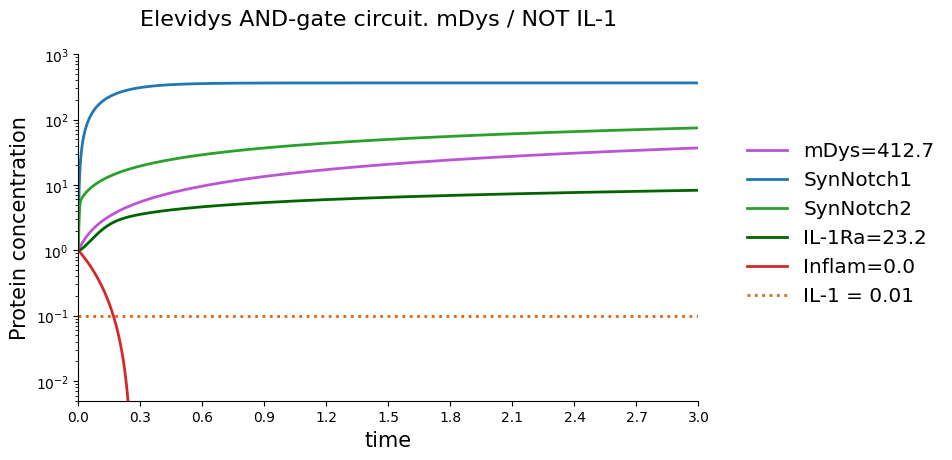

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as scint

tpoints=5000; tmax=3
time = np.linspace(0,tmax,tpoints)
P0 = [1,1,1,1,1]
Ps = scint.odeint(F,P0,time)

fig,ax = plt.subplots(figsize=(8,4.5))
fig.suptitle('Elevidys AND-gate circuit. mDys / NOT IL-1',fontsize=16)

SteadyState = SS()

lw=2
ax.plot(time,Ps[:,0],c="mediumorchid",lw=lw,label=f'mDys={round(SteadyState[0],1)}')
ax.plot(time,Ps[:,1],c="tab:blue",lw=lw,label='SynNotch1')
ax.plot(time,Ps[:,2],c="tab:green",lw=lw,label='SynNotch2')
ax.plot(time,Ps[:,3],c="darkgreen",lw=lw,label=f'IL-1Ra={round(SteadyState[3],1)}')
ax.plot(time,Ps[:,4],c="tab:red",lw=lw,label=f'Inflam={round(SteadyState[4],1)}')
ax.axhline(0.1,c='chocolate',lw=lw,ls=':',label=f'IL-1 = {X8}')

ymax=1000
xmax=tmax
ax.set_ylim(0.005,ymax)
ax.set_xlim(0,xmax)
axlabelsize=15
ax.set_ylabel('Protein concentration',fontsize=axlabelsize)
ax.set_xlabel('time',fontsize=axlabelsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')

ax.set_xticks(np.arange(0,xmax+abs(0.1*xmax),abs(0.1*xmax)))

ax.legend(frameon=False,fontsize='x-large',ncol=1, bbox_to_anchor=(1.05,0.8))

plt.show()

#### mDys + IL-1 -> produce antagonist (& inflammation) 

In [139]:
a1 = 4 ; X8 = 4
SS()

[412.72340691791993,
 363.9310514827227,
 406.83117206297584,
 702.5539730199308,
 0.0004981916510753959]

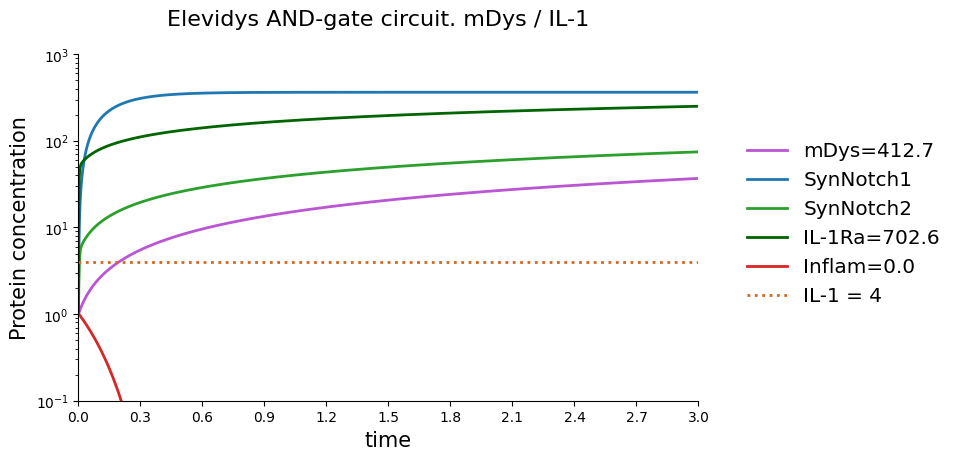

In [140]:
tpoints=5000; tmax=3
time = np.linspace(0,tmax,tpoints)
P0 = [1,1,1,1,1]
Ps = scint.odeint(F,P0,time)

fig,ax = plt.subplots(figsize=(8,4.5))
fig.suptitle('Elevidys AND-gate circuit. mDys / IL-1',fontsize=16)

SteadyState = SS()

lw=2
ax.plot(time,Ps[:,0],c="mediumorchid",lw=lw,label=f'mDys={round(SteadyState[0],1)}')
ax.plot(time,Ps[:,1],c="tab:blue",lw=lw,label='SynNotch1')
ax.plot(time,Ps[:,2],c="tab:green",lw=lw,label='SynNotch2')
ax.plot(time,Ps[:,3],c="darkgreen",lw=lw,label=f'IL-1Ra={round(SteadyState[3],1)}')
ax.plot(time,Ps[:,4],c="tab:red",lw=lw,label=f'Inflam={round(SteadyState[4],1)}')
ax.axhline(X8,c='chocolate',lw=lw,ls=':',label=f'IL-1 = {X8}')

ymax=1000
xmax=tmax
ax.set_ylim(0.1,ymax)
ax.set_xlim(0,xmax)
axlabelsize=15
ax.set_ylabel('Protein concentration',fontsize=axlabelsize)
ax.set_xlabel('time',fontsize=axlabelsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')

ax.set_xticks(np.arange(0,xmax+abs(0.1*xmax),abs(0.1*xmax)))

ax.legend(frameon=False,fontsize='x-large',ncol=1, bbox_to_anchor=(1.05,0.8))

plt.show()

#### NOT mDys + IL-1 -> NOT produce antagonist (& inflammation) 

In [32]:
a1 = 0.01 ; X8 = 4
SS()

[1.0239106242962107e-06,
 363.9310514827227,
 0.0003687725668982559,
 0.1501235975736126,
 284.5884471385111]

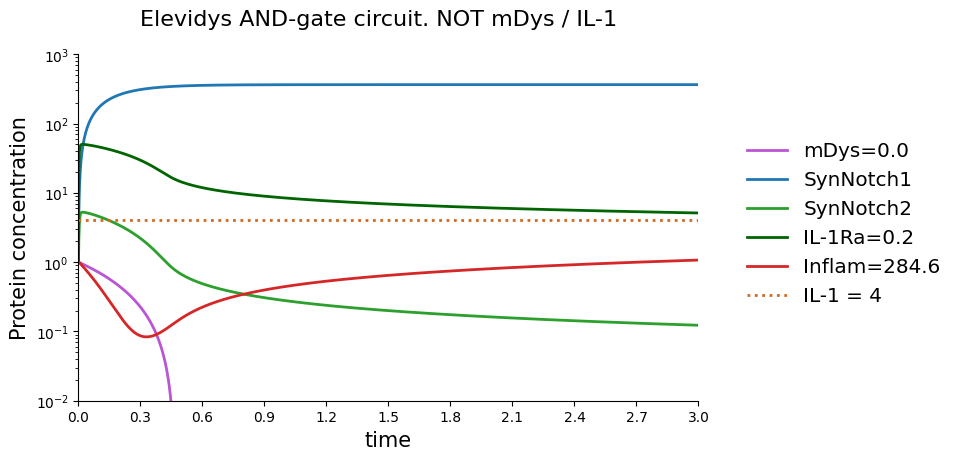

In [33]:
tpoints=10000; tmax=3
time = np.linspace(0,tmax,tpoints)
P0 = [1,1,1,1,1]
Ps = scint.odeint(F,P0,time)

fig,ax = plt.subplots(figsize=(8,4.5))
fig.suptitle('Elevidys AND-gate circuit. NOT mDys / IL-1',fontsize=16)

SteadyState = SS()

lw=2
ax.plot(time,Ps[:,0],c="mediumorchid",lw=lw,label=f'mDys={round(SteadyState[0],1)}')
ax.plot(time,Ps[:,1],c="tab:blue",lw=lw,label='SynNotch1')
ax.plot(time,Ps[:,2],c="tab:green",lw=lw,label='SynNotch2')
ax.plot(time,Ps[:,3],c="darkgreen",lw=lw,label=f'IL-1Ra={round(SteadyState[3],1)}')
ax.plot(time,Ps[:,4],c="tab:red",lw=lw,label=f'Inflam={round(SteadyState[4],1)}')
ax.axhline(X8,c='chocolate',lw=lw,ls=':',label=f'IL-1 = {X8}')

ymax=1000
xmax=tmax
ax.set_ylim(0.01,ymax)
ax.set_xlim(0,xmax)
axlabelsize=15
ax.set_ylabel('Protein concentration',fontsize=axlabelsize)
ax.set_xlabel('time',fontsize=axlabelsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')

ax.set_xticks(np.arange(0,xmax+abs(0.1*xmax),abs(0.1*xmax)))
# ax.set_xticks(np.arange(0,xmax+abs(0.5*xmax),abs(0.5*xmax)))


ax.legend(frameon=False,fontsize='x-large',ncol=1, bbox_to_anchor=(1.05,0.8))

plt.show()

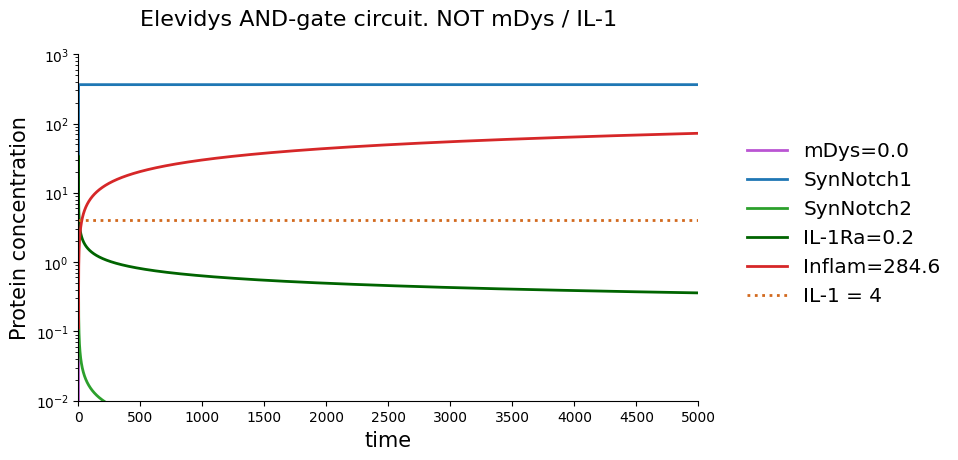

In [35]:
tpoints=20000; tmax=5000
time = np.linspace(0,tmax,tpoints)
P0 = [1,1,1,1,1]
Ps = scint.odeint(F,P0,time)

fig,ax = plt.subplots(figsize=(8,4.5))
fig.suptitle('Elevidys AND-gate circuit. NOT mDys / IL-1',fontsize=16)

SteadyState = SS()

lw=2
ax.plot(time,Ps[:,0],c="mediumorchid",lw=lw,label=f'mDys={round(SteadyState[0],1)}')
ax.plot(time,Ps[:,1],c="tab:blue",lw=lw,label='SynNotch1')
ax.plot(time,Ps[:,2],c="tab:green",lw=lw,label='SynNotch2')
ax.plot(time,Ps[:,3],c="darkgreen",lw=lw,label=f'IL-1Ra={round(SteadyState[3],1)}')
ax.plot(time,Ps[:,4],c="tab:red",lw=lw,label=f'Inflam={round(SteadyState[4],1)}')
ax.axhline(X8,c='chocolate',lw=lw,ls=':',label=f'IL-1 = {X8}')

ymax=1000
xmax=tmax
ax.set_ylim(0.01,ymax)
ax.set_xlim(0,xmax)
axlabelsize=15
ax.set_ylabel('Protein concentration',fontsize=axlabelsize)
ax.set_xlabel('time',fontsize=axlabelsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')

ax.set_xticks(np.arange(0,xmax+abs(0.1*xmax),abs(0.1*xmax)))
# ax.set_xticks(np.arange(0,xmax+abs(0.5*xmax),abs(0.5*xmax)))


ax.legend(frameon=False,fontsize='x-large',ncol=1, bbox_to_anchor=(1.05,0.8))

plt.show()

#### NOT mDys + NOT IL-1 -> NOT produce antagonist (& no inflammation) 

In [36]:
a1 = 0.01 ; X8 = 0.01
SS()

[1.0239106242962107e-06,
 363.9310514827227,
 0.0003687725668982559,
 0.004966918580160287,
 0.04502005582493672]

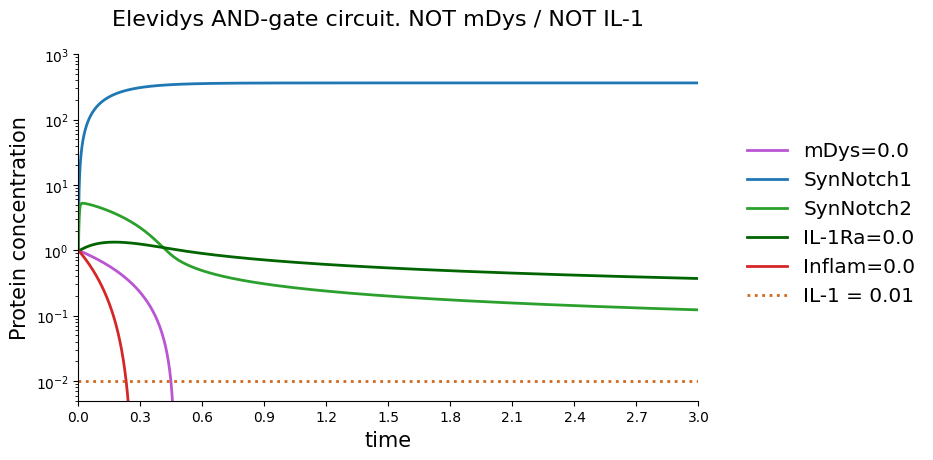

In [37]:
tpoints=5000; tmax=3
time = np.linspace(0,tmax,tpoints)
P0 = [1,1,1,1,1]
Ps = scint.odeint(F,P0,time)

fig,ax = plt.subplots(figsize=(8,4.5))
fig.suptitle('Elevidys AND-gate circuit. NOT mDys / NOT IL-1',fontsize=16)

SteadyState = SS()

lw=2
ax.plot(time,Ps[:,0],c="mediumorchid",lw=lw,label=f'mDys={round(SteadyState[0],1)}')
ax.plot(time,Ps[:,1],c="tab:blue",lw=lw,label='SynNotch1')
ax.plot(time,Ps[:,2],c="tab:green",lw=lw,label='SynNotch2')
ax.plot(time,Ps[:,3],c="darkgreen",lw=lw,label=f'IL-1Ra={round(SteadyState[3],1)}')
ax.plot(time,Ps[:,4],c="tab:red",lw=lw,label=f'Inflam={round(SteadyState[4],1)}')
ax.axhline(X8,c='chocolate',lw=lw,ls=':',label=f'IL-1 = {X8}')

ymax=1000
xmax=tmax
ax.set_ylim(0.005,ymax)
ax.set_xlim(0,xmax)
axlabelsize=15
ax.set_ylabel('Protein concentration',fontsize=axlabelsize)
ax.set_xlabel('time',fontsize=axlabelsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('log')

ax.set_xticks(np.arange(0,xmax+abs(0.1*xmax),abs(0.1*xmax)))

ax.legend(frameon=False,fontsize='x-large',ncol=1, bbox_to_anchor=(1.05,0.8))

plt.show()